In [45]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [46]:
#reading the json file
data=pd.read_json(r"D:\tops_fashion.json")

In [47]:
#number of data points basically refers to the no of products here
#no of features of those products
print("Number of data points:",data.shape[0],\
     "Number of features or variable:",data.shape[1])

Number of data points: 183138 Number of features or variable: 19


In [48]:
#we see what are the feature available
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [49]:
#out of thee 19 features we tend to use the main 6 feature
data=data[["asin","brand","color","medium_image_url","product_type_name","title","formatted_price"]]

In [50]:
print("Number of data points:",data.shape[0],\
     "Number of features or variable:",data.shape[1])

Number of data points: 183138 Number of features or variable: 7


In [51]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


# Analysing and Cleaning of data

In [52]:
print(data["product_type_name"].describe())
#describe gives us general insights

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [53]:
print(data["product_type_name"].unique())
#unique gives indepth insight

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [54]:
# finding 10 most frequently used product type names
#counter count frequency for all the product
#.most_common(10)display 10 top most
product_type_count=Counter(list(data["product_type_name"]))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [55]:
print(data["brand"].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [56]:
# finding 10 most frequently used brand names
#counter count frequency for all the brands
#.most_common(10)display 10 top most
brand_count=Counter(list(data["brand"]))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [57]:
print(data["color"].describe())
#7380 unique colors


count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [58]:
# finding 10 most frequently used color names
#counter count frequency for all the color
#.most_common(10)display 10 top most
color_count=Counter(list(data["color"]))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [59]:
print(data["formatted_price"].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [60]:
# finding 10 most frequently used prices
#counter count frequency for all the prices
#.most_common(10)display 10 top most
color_count=Counter(list(data["formatted_price"]))
color_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [62]:
print(data["title"].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [63]:
data.to_pickle(r"D:\180k_apparel_data")

In [64]:
#removing near duplicate items (.duplicated is used for this)

print(sum(data.duplicated("title")))

7153


In [65]:
#removing products with a very small title as it is not a goog way of recommendation
data_sorted=data[data["title"].apply(lambda x:len(x.split())>4)]
print("After removal of products with short description:",data_sorted.shape[0])

After removal of products with short description: 178026


In [66]:
#sort whole dataset in ascending order
data_sorted.sort_values("title",inplace=True,ascending=False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
27547,B073W7P8KK,Nation LTD,Blue,https://images-na.ssl-images-amazon.com/images...,DRESS,❀Nation Women Stripe Blouse Long Sleeve Shirt ...,None
31277,B01M0PWMZ8,Anglin,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...,None
30453,B01M02GWRG,Anglin,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...,None
32485,B01N0ADXM0,Anglin,Red,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Fashion Stripe Dress Round Coll...,None
26767,B01MTQAU86,Anglin,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Autumn Winter Christmas Printin...,None


In [67]:
#after this type of sorting simialr titles appear
#eg-abcdef XL,abcdef L hence we want to remove them
#This helps us to get unique recommendations    

In [68]:
indices=[]
for i,row in data_sorted.iterrows():
    indices.append(i)

In [69]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [70]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [71]:
print('Number of data points : ', data.shape[0])

Number of data points :  151252


In [72]:
data.to_pickle(r"D:\17k_apperal_data")

In [ ]:
#removing titles with very similar titles (not quite same as before )
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [ ]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

# text preprocessing

In [73]:
data.to_pickle(r"D:\16k_apperal_data")

In [74]:
data = pd.read_pickle(r"D:\16k_apperal_data")


In [75]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'hers', 'whom', 'from', 'aren', 'have', 't', 'each', "doesn't", 'him', 'does', 'once', 'when', 'all', 'should', 'didn', 'do', 'up', 'for', "aren't", 'at', 'any', 'now', 'that', 'ours', 'below', 'above', 'what', 'it', 'because', 'is', 'will', 'where', 'out', 'most', 'wasn', 'a', 'y', 'ain', 'few', "mightn't", 'through', 're', 'he', 'there', 'you', 'about', 'in', "couldn't", 'i', 'or', 'and', 'both', 'down', 'o', 'm', 'they', 'don', 'too', 'my', 'themselves', 'these', 'has', 'than', 'wouldn', "wasn't", 'yourself', 'were', 'then', 'no', 'an', 'after', 'weren', 'did', 'had', "don't", 'theirs', 'which', 'to', 'being', 'yours', 'me', 'shan', "you'll", 'ourselves', 'we', 'having', 'again', 'other', 'who', 'can', 'not', 'same', "weren't", 's', 'our', 'on', 'own', 'been', "won't", 'hasn', 'are', "shan't", 'with', "you've", 'her', 've', 'mightn', 'won', 'itself', 'them', 'those', 'hadn', 'why', "should've", 'how', 'into', 'here', 'so', 'while', "you'd", "that'll", 'before', 

In [76]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
5,B00TAEHGGS,Fitscloth,Grape,https://images-na.ssl-images-amazon.com/images...,SHIRT,[Fits Cloth] Grape Solid Modern Long Sleeve Pl...,None
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99


# Stemming

In [77]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))

argu
fish


# Text based similarity

In [78]:
data = pd.read_pickle(r"D:\16k_apperal_data_preprocessed")
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


In [79]:
# Utility Functions which we will use through the rest of the project


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  

 #plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

# BOW

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus

# What is a sparse vector?

# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc



(17593, 12927)

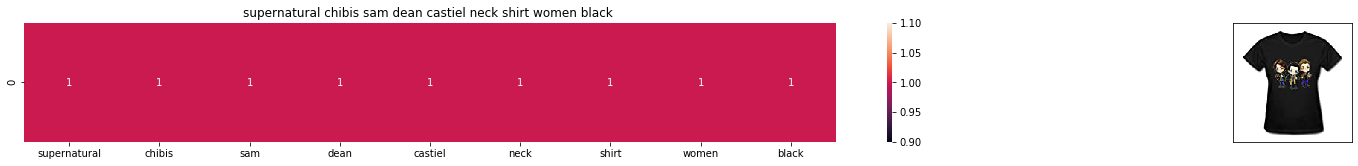

ASIN : B014ICB9A0
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck shirt women black 
Euclidean similarity with the query image : 0.0


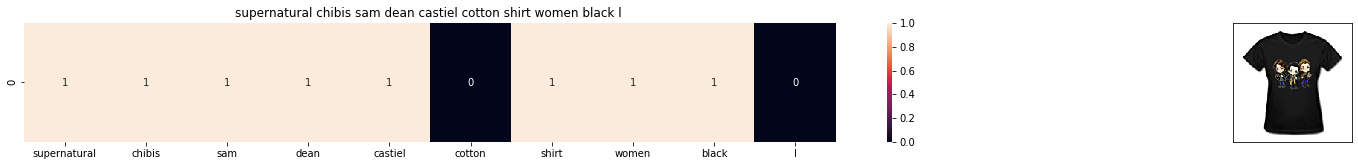

ASIN : B014ICBG9Y
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirt women black l 
Euclidean similarity with the query image : 1.4142135623730951


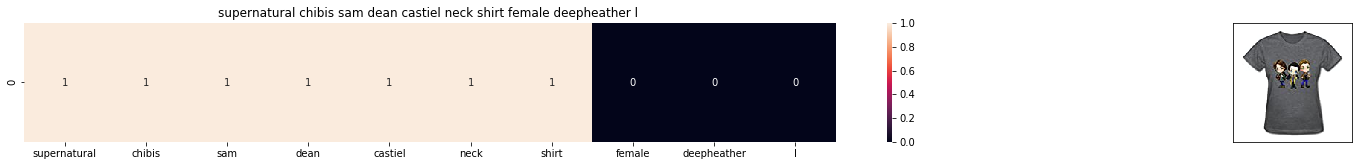

ASIN : B014ICDELM
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck shirt female deepheather l 
Euclidean similarity with the query image : 2.0


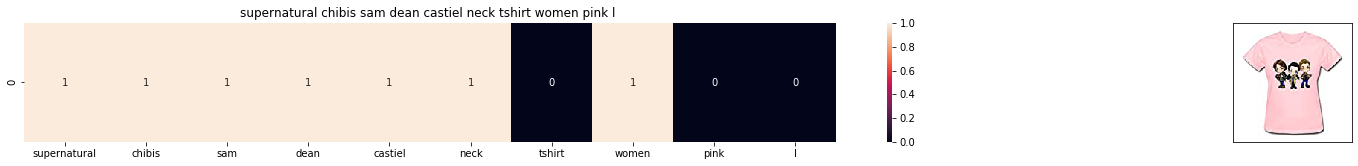

ASIN : B014IC8FZC
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck tshirt women pink l 
Euclidean similarity with the query image : 2.0


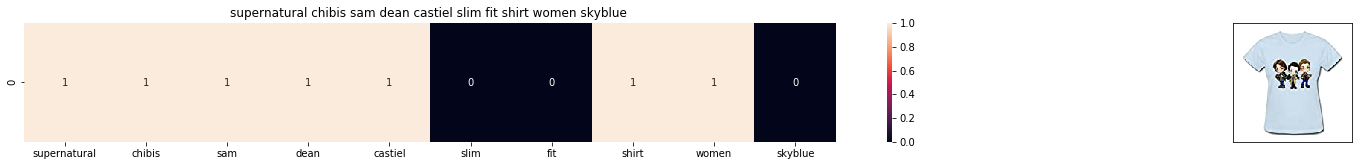

ASIN : B014ICDTYO
Brand: FNC7C
Title: supernatural chibis sam dean castiel slim fit shirt women skyblue 
Euclidean similarity with the query image : 2.23606797749979


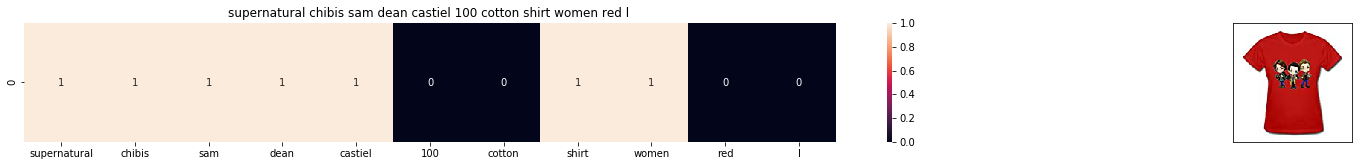

ASIN : B014ICC6AC
Brand: FNC7C
Title: supernatural chibis sam dean castiel 100 cotton shirt women red l 
Euclidean similarity with the query image : 2.23606797749979


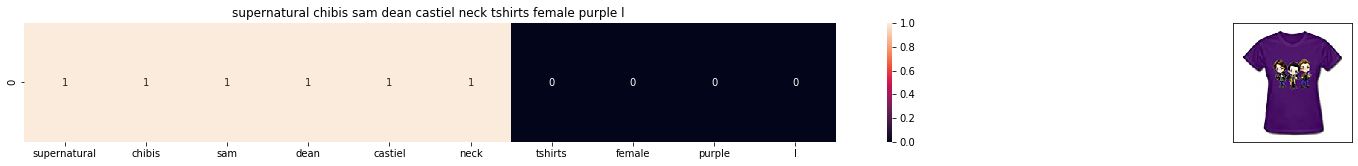

ASIN : B014ICEJ1Q
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck tshirts female purple l 
Euclidean similarity with the query image : 2.449489742783178


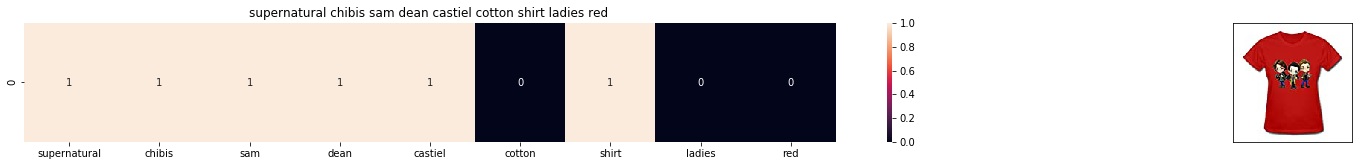

ASIN : B014ICC10C
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirt ladies red 
Euclidean similarity with the query image : 2.449489742783178


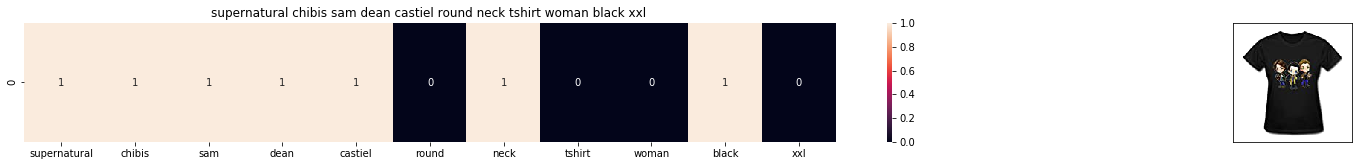

ASIN : B014ICBNQU
Brand: FNC7C
Title: supernatural chibis sam dean castiel round neck tshirt woman black xxl 
Euclidean similarity with the query image : 2.449489742783178


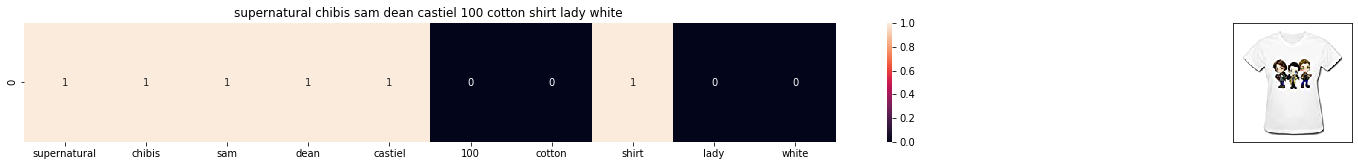

ASIN : B014ICAJT2
Brand: FNC7C
Title: supernatural chibis sam dean castiel 100 cotton shirt lady white 
Euclidean similarity with the query image : 2.6457513110645907


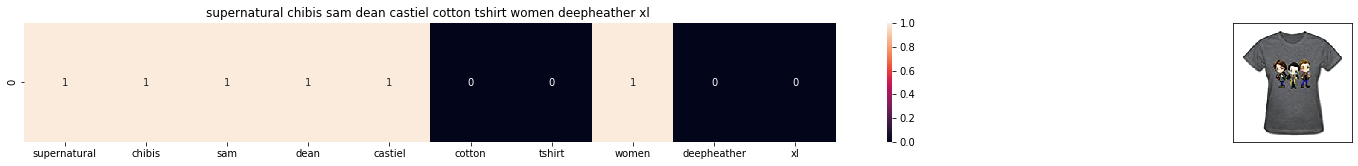

ASIN : B014ICDIGI
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton tshirt women deepheather xl 
Euclidean similarity with the query image : 2.6457513110645907


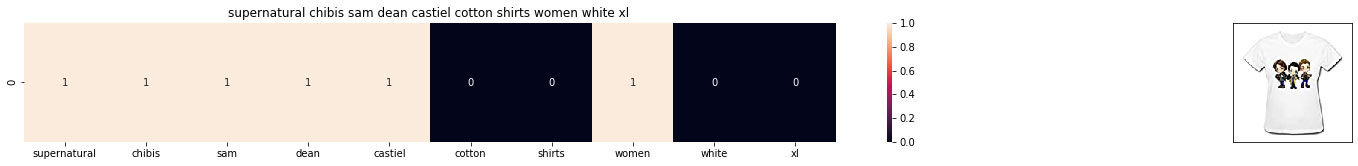

ASIN : B014ICAV4K
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirts women white xl 
Euclidean similarity with the query image : 2.6457513110645907


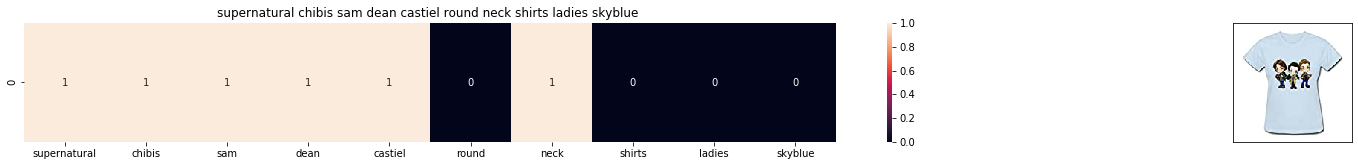

ASIN : B014ICDXOK
Brand: FNC7C
Title: supernatural chibis sam dean castiel round neck shirts ladies skyblue 
Euclidean similarity with the query image : 2.6457513110645907


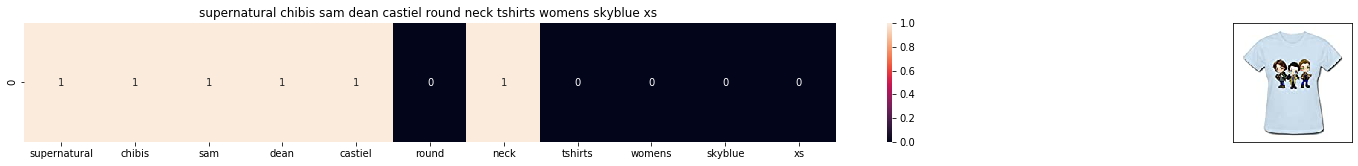

ASIN : B014ICDRHI
Brand: FNC7C
Title: supernatural chibis sam dean castiel round neck tshirts womens skyblue xs 
Euclidean similarity with the query image : 2.8284271247461903


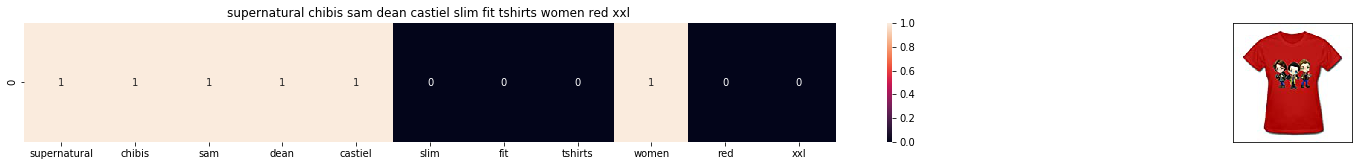

ASIN : B014ICCD3M
Brand: FNC7C
Title: supernatural chibis sam dean castiel slim fit tshirts women red xxl 
Euclidean similarity with the query image : 2.8284271247461903


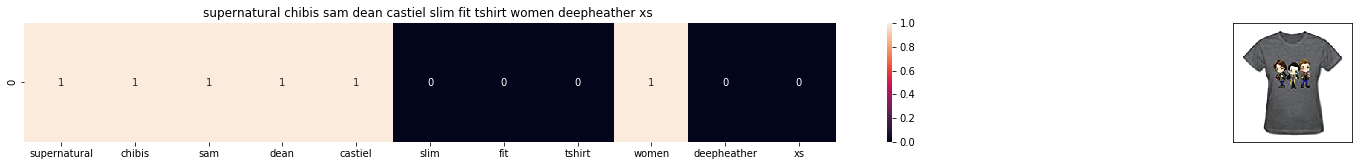

ASIN : B014ICD2D2
Brand: FNC7C
Title: supernatural chibis sam dean castiel slim fit tshirt women deepheather xs 
Euclidean similarity with the query image : 2.8284271247461903


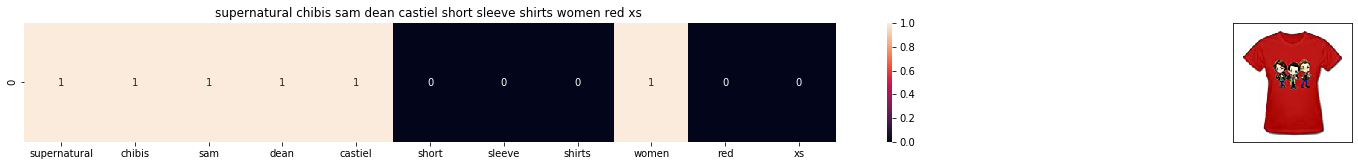

ASIN : B014ICBSE2
Brand: FNC7C
Title: supernatural chibis sam dean castiel short sleeve shirts women red xs 
Euclidean similarity with the query image : 2.8284271247461903


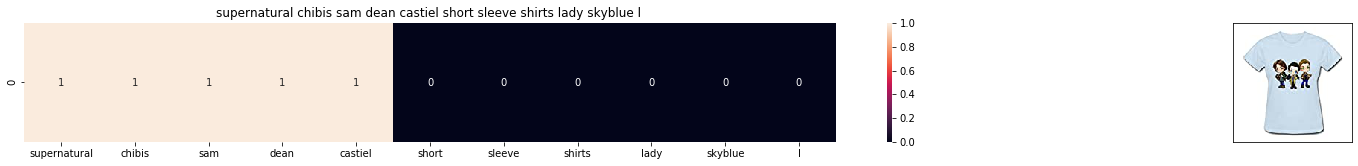

ASIN : B014ICE0VK
Brand: FNC7C
Title: supernatural chibis sam dean castiel short sleeve shirts lady skyblue l 
Euclidean similarity with the query image : 3.0


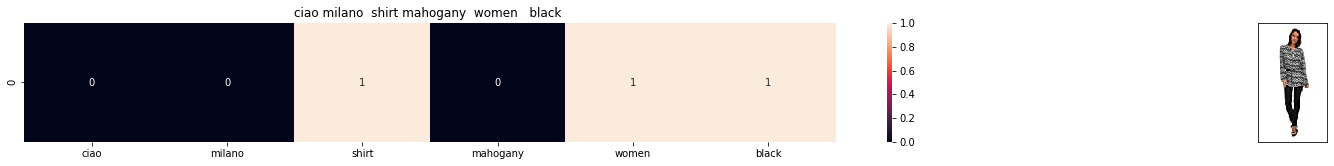

ASIN : B01HMQYORY
Brand: Ciao Milano
Title: ciao milano  shirt mahogany  women   black 
Euclidean similarity with the query image : 3.0


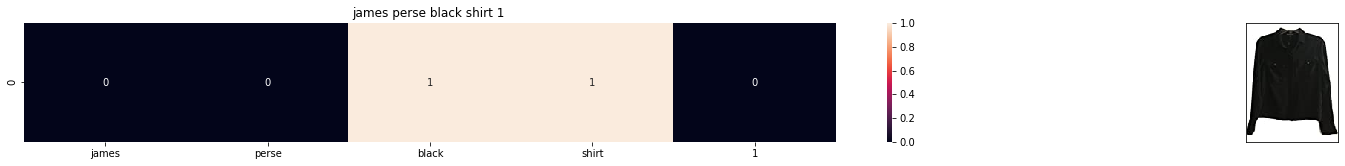

ASIN : B01N8Z2K60
Brand: James Perse
Title: james perse black shirt 1 
Euclidean similarity with the query image : 3.0


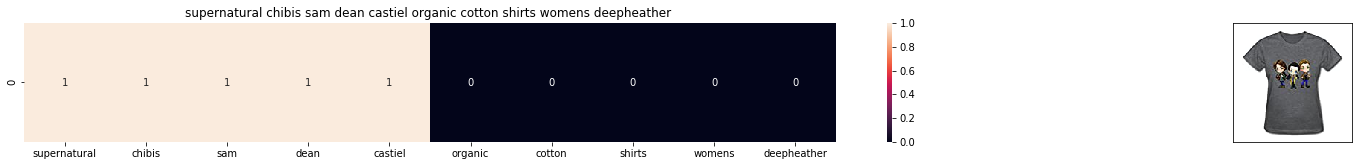

ASIN : B014ICD9YO
Brand: FNC7C
Title: supernatural chibis sam dean castiel organic cotton shirts womens deepheather 
Euclidean similarity with the query image : 3.0


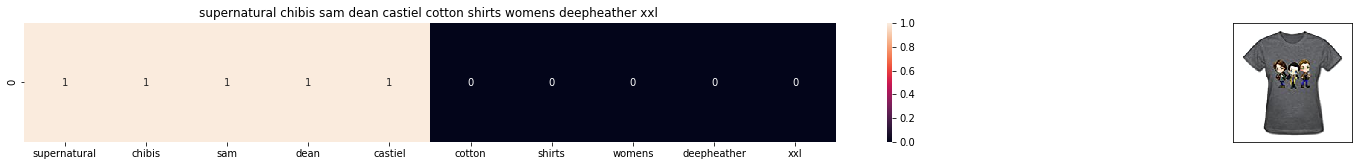

ASIN : B014ICDNZY
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirts womens deepheather xxl 
Euclidean similarity with the query image : 3.0


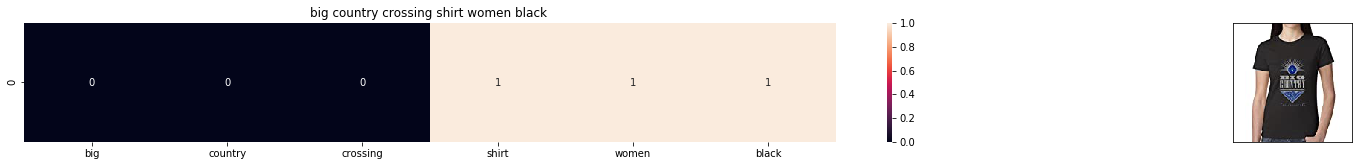

ASIN : B01HEPDCK8
Brand: Tony Arden
Title: big country crossing shirt women black 
Euclidean similarity with the query image : 3.0


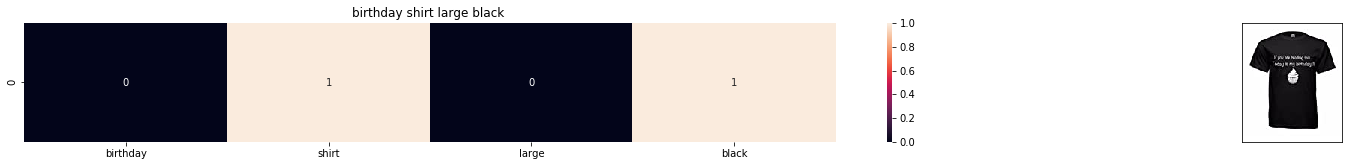

ASIN : B06XQ5V17Z
Brand: Speak Your Piece
Title: birthday shirt large black 
Euclidean similarity with the query image : 3.0


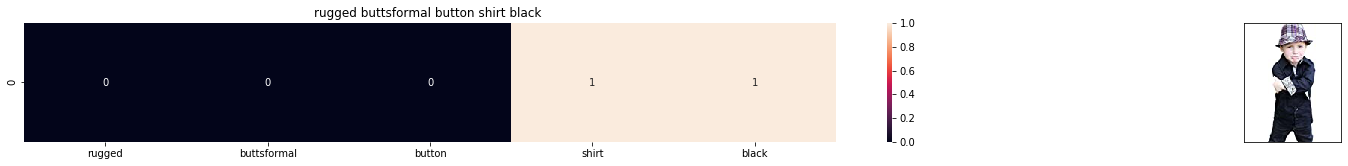

ASIN : B00HDNKYZI
Brand: RuffleButts
Title: rugged buttsformal button shirt black 
Euclidean similarity with the query image : 3.1622776601683795


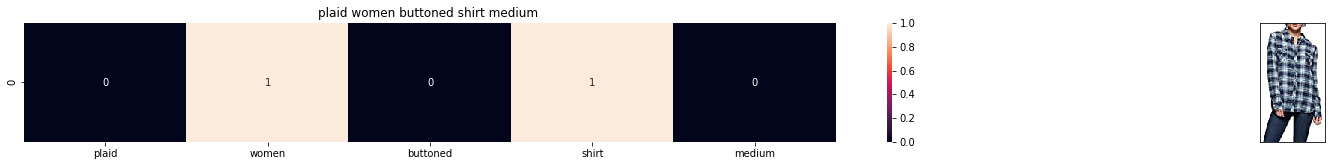

ASIN : B073Z62J6P
Brand: Ambience
Title: plaid women buttoned shirt medium 
Euclidean similarity with the query image : 3.1622776601683795


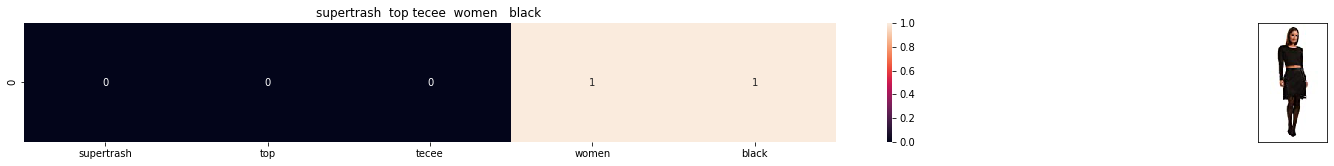

ASIN : B017T9ZCYI
Brand: Super Trash
Title: supertrash  top tecee  women   black 
Euclidean similarity with the query image : 3.1622776601683795


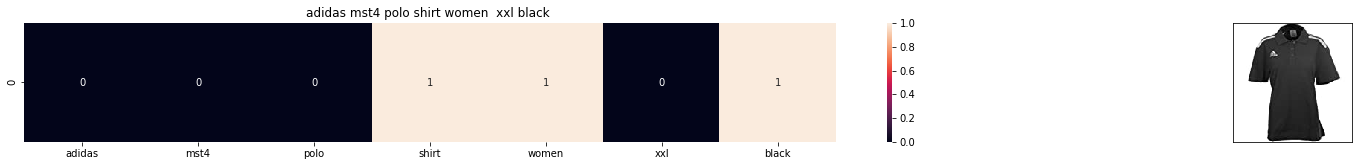

ASIN : B00118UDFW
Brand: None
Title: adidas mst4 polo shirt women  xxl black 
Euclidean similarity with the query image : 3.1622776601683795


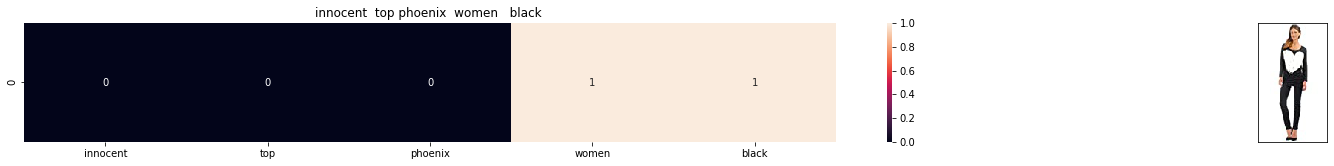

ASIN : B01HMQR4DA
Brand: Innocent
Title: innocent  top phoenix  women   black 
Euclidean similarity with the query image : 3.1622776601683795


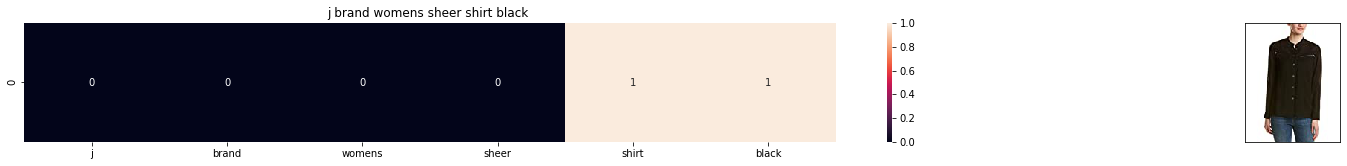

ASIN : B013L1V8PK
Brand: J Brand Jeans
Title: j brand womens sheer shirt black 
Euclidean similarity with the query image : 3.1622776601683795


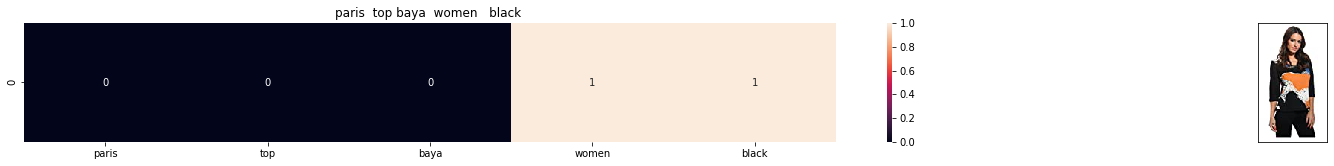

ASIN : B06XHPY9QK
Brand: For Her Paris
Title: paris  top baya  women   black 
Euclidean similarity with the query image : 3.1622776601683795


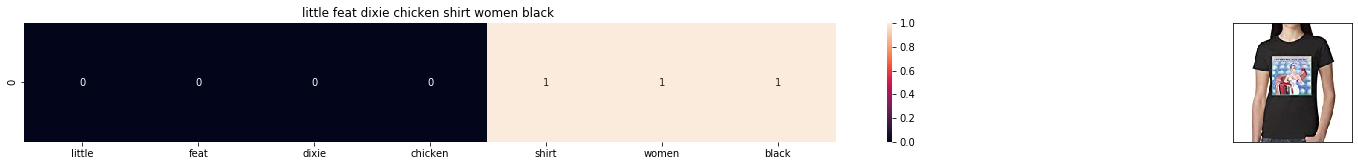

ASIN : B01HAU2IA2
Brand: Tony Arden
Title: little feat dixie chicken shirt women black 
Euclidean similarity with the query image : 3.1622776601683795


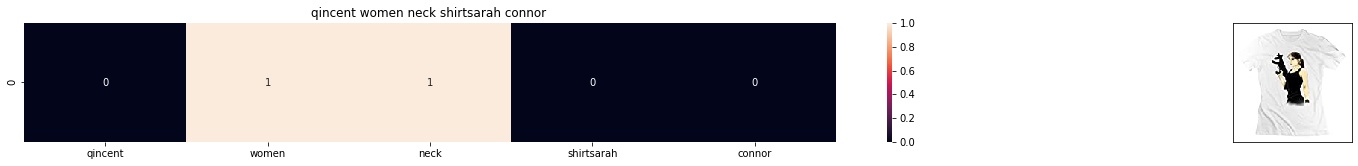

ASIN : B01C7FP956
Brand: Qincent
Title: qincent women neck shirtsarah connor 
Euclidean similarity with the query image : 3.1622776601683795


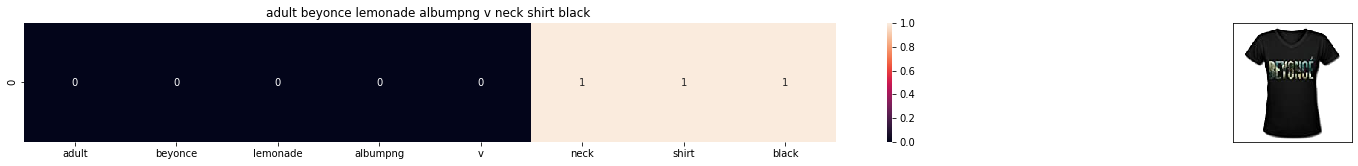

ASIN : B01GNW4L4Y
Brand: GRXBRS
Title: adult beyonce lemonade albumpng v neck shirt black 
Euclidean similarity with the query image : 3.1622776601683795


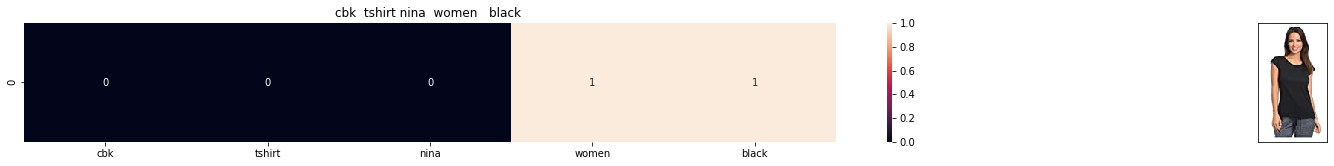

ASIN : B071YLW43P
Brand: CBK
Title: cbk  tshirt nina  women   black 
Euclidean similarity with the query image : 3.1622776601683795


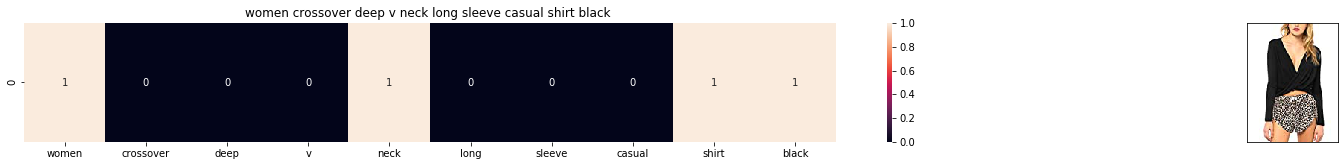

ASIN : B00WW9RVW2
Brand: uxcell
Title: women crossover deep v neck long sleeve casual shirt black 
Euclidean similarity with the query image : 3.1622776601683795


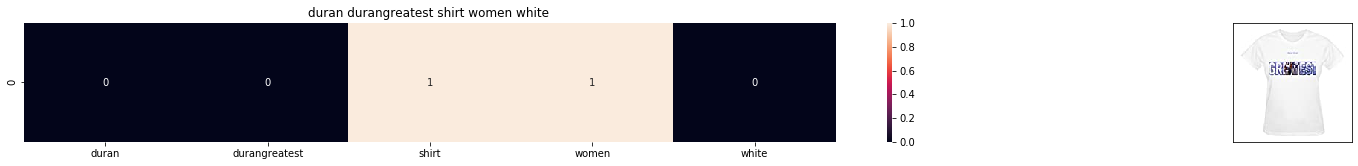

ASIN : B01H51HH6G
Brand: Tony Arden
Title: duran durangreatest shirt women white 
Euclidean similarity with the query image : 3.1622776601683795


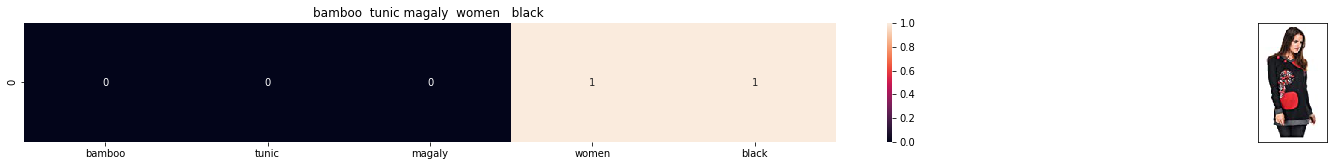

ASIN : B01LW182DW
Brand: Bamboo s
Title: bamboo  tunic magaly  women   black 
Euclidean similarity with the query image : 3.1622776601683795


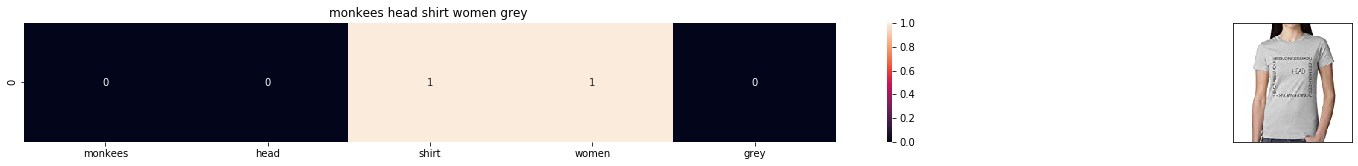

ASIN : B01HNY3KCU
Brand: Tony Arden
Title: monkees head shirt women grey 
Euclidean similarity with the query image : 3.1622776601683795


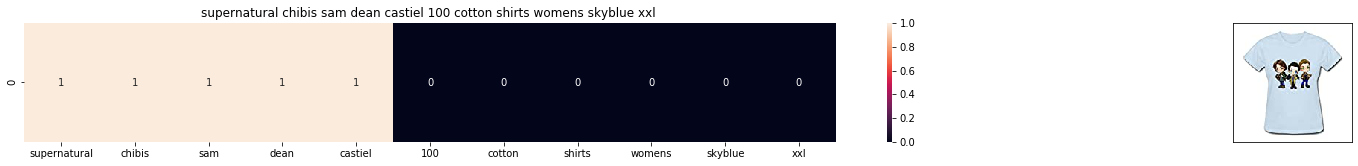

ASIN : B014ICE7IQ
Brand: FNC7C
Title: supernatural chibis sam dean castiel 100 cotton shirts womens skyblue xxl 
Euclidean similarity with the query image : 3.1622776601683795


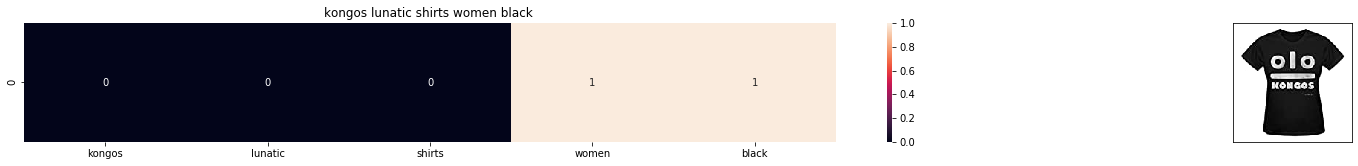

ASIN : B01IXZLG2Y
Brand: Moonflow
Title: kongos lunatic shirts women black 
Euclidean similarity with the query image : 3.1622776601683795


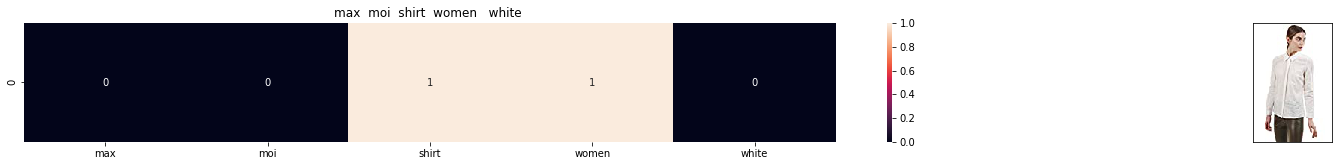

ASIN : B072HPKCM9
Brand: Max & Moi
Title: max  moi  shirt  women   white 
Euclidean similarity with the query image : 3.1622776601683795


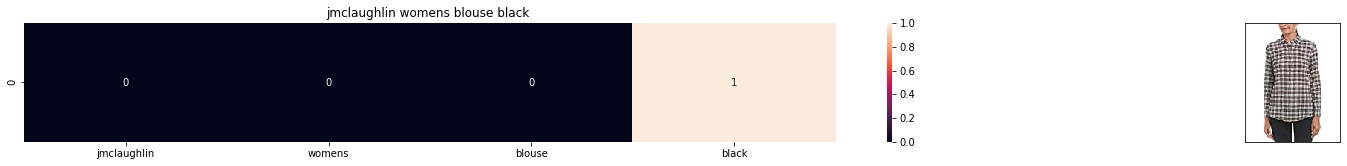

ASIN : B074KN55WS
Brand: J. McLaughlin
Title: jmclaughlin womens blouse black 
Euclidean similarity with the query image : 3.3166247903554


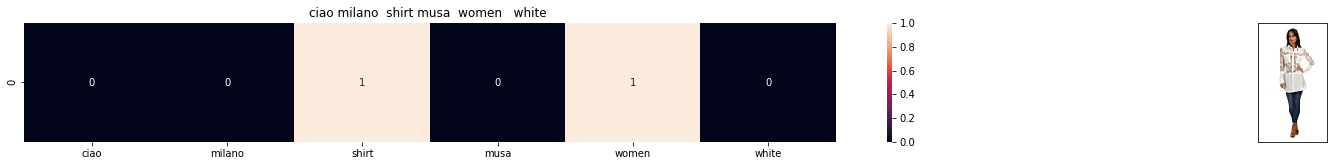

ASIN : B01HMQTKXM
Brand: Ciao Milano
Title: ciao milano  shirt musa  women   white 
Euclidean similarity with the query image : 3.3166247903554


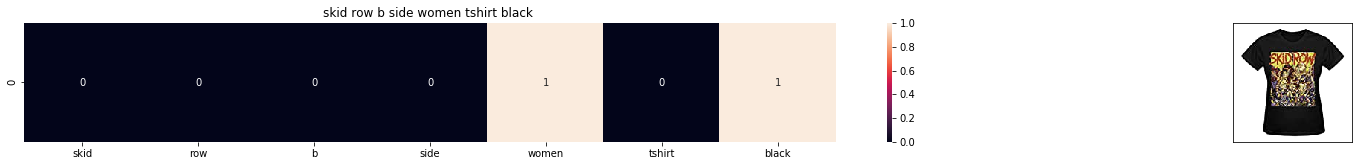

ASIN : B01H8QJCKW
Brand: Tony Arden
Title: skid row b side women tshirt black 
Euclidean similarity with the query image : 3.3166247903554


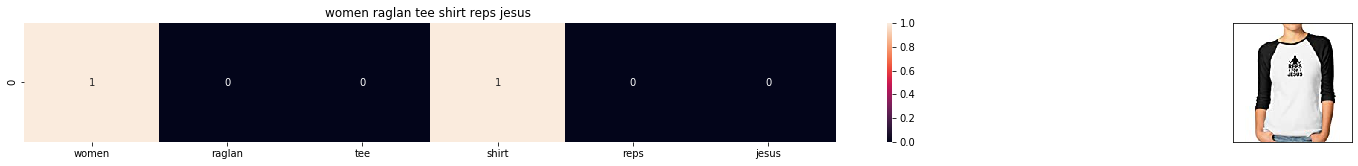

ASIN : B01IZB3ICW
Brand: TopSeeti
Title: women raglan tee shirt reps jesus 
Euclidean similarity with the query image : 3.3166247903554


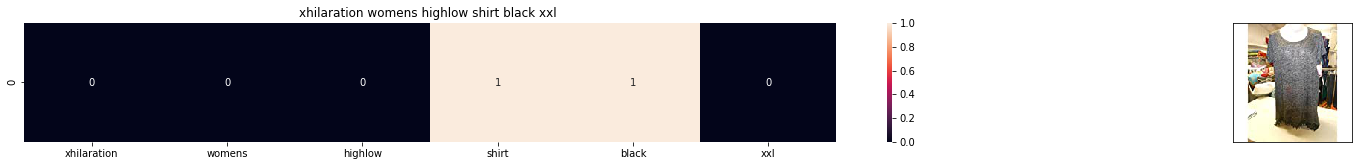

ASIN : B06Y1NF6M7
Brand: Xhilaration
Title: xhilaration womens highlow shirt black xxl 
Euclidean similarity with the query image : 3.3166247903554


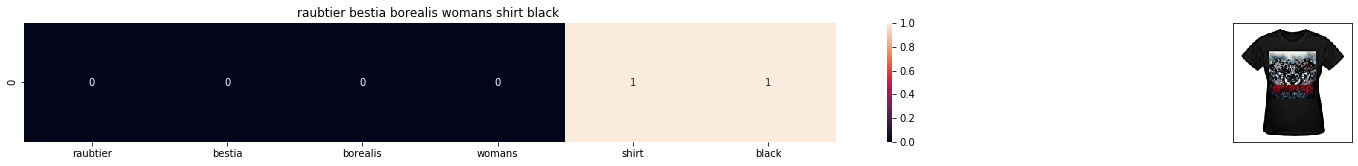

ASIN : B01I6NSYGO
Brand: Tony Arden
Title: raubtier bestia borealis womans shirt black 
Euclidean similarity with the query image : 3.3166247903554


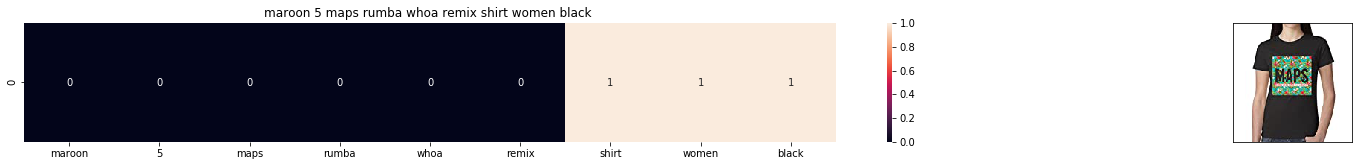

ASIN : B01HAU17U4
Brand: Tony Arden
Title: maroon 5 maps rumba whoa remix shirt women black 
Euclidean similarity with the query image : 3.3166247903554


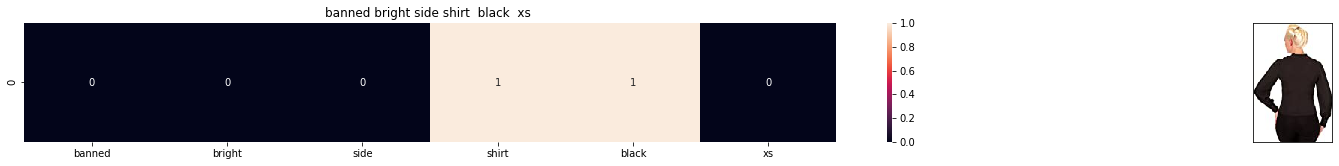

ASIN : B017NU1B6Q
Brand: Banned
Title: banned bright side shirt  black  xs 
Euclidean similarity with the query image : 3.3166247903554


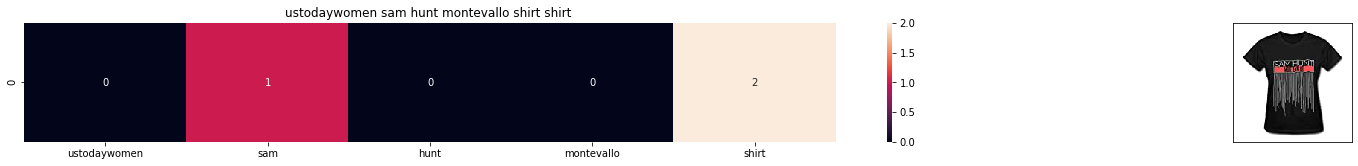

ASIN : B01LTHDVCQ
Brand: USASTATE-421
Title: ustodaywomen sam hunt montevallo shirt shirt 
Euclidean similarity with the query image : 3.3166247903554


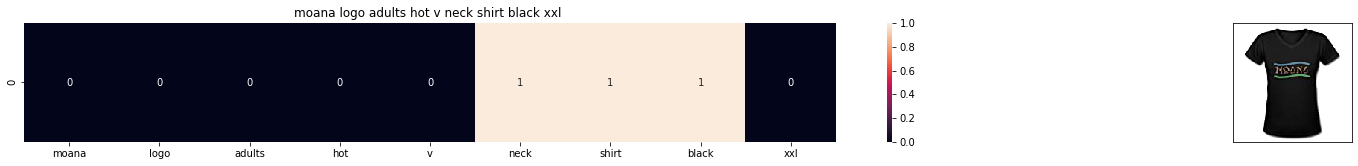

ASIN : B01LX6H43D
Brand: BOBOB
Title: moana logo adults hot v neck shirt black xxl 
Euclidean similarity with the query image : 3.3166247903554


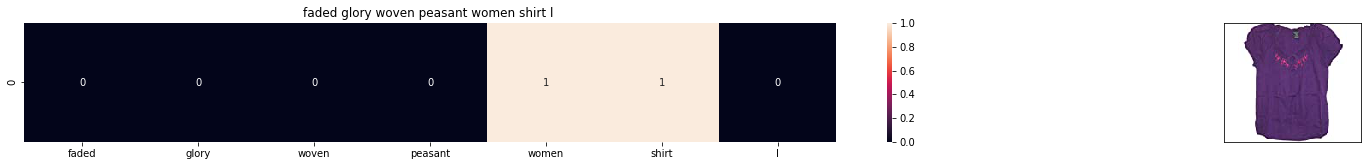

ASIN : B00LMK7YMY
Brand: Faded Glory
Title: faded glory woven peasant women shirt l 
Euclidean similarity with the query image : 3.3166247903554


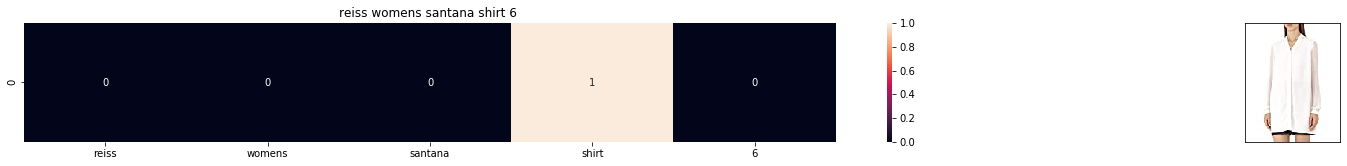

ASIN : B071SCP96Z
Brand: Reiss
Title: reiss womens santana shirt 6 
Euclidean similarity with the query image : 3.3166247903554


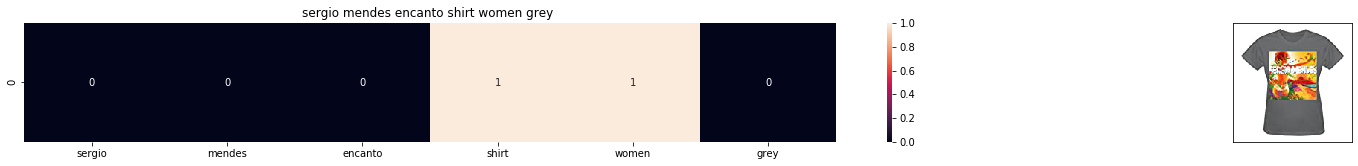

ASIN : B01I6NU1OM
Brand: Tony Arden
Title: sergio mendes encanto shirt women grey 
Euclidean similarity with the query image : 3.3166247903554


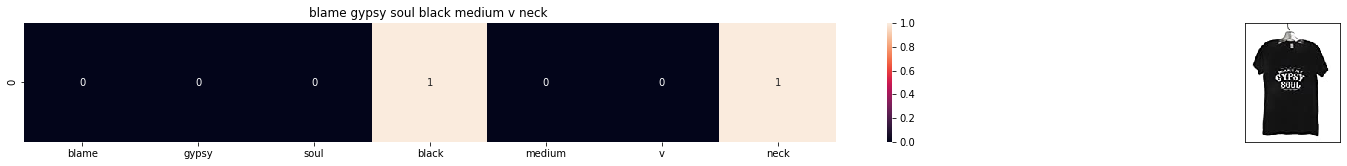

ASIN : B01BLQ50E2
Brand: Camp Ojai
Title: blame gypsy soul black medium v neck 
Euclidean similarity with the query image : 3.3166247903554


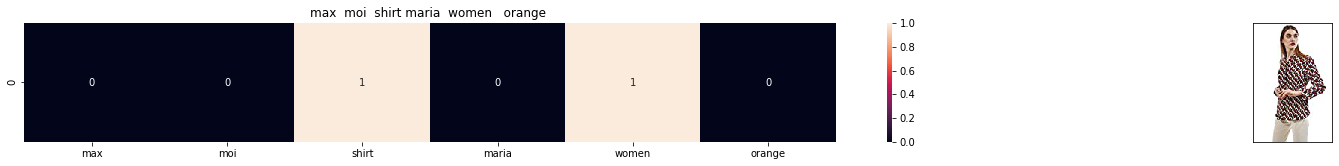

ASIN : B071L2Z82T
Brand: Max & Moi
Title: max  moi  shirt maria  women   orange 
Euclidean similarity with the query image : 3.3166247903554


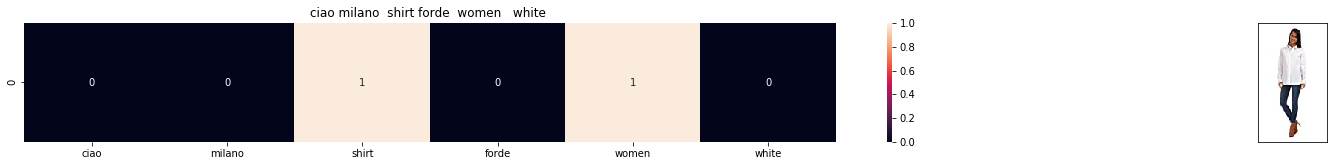

ASIN : B01HMPH6O8
Brand: Ciao Milano
Title: ciao milano  shirt forde  women   white 
Euclidean similarity with the query image : 3.3166247903554


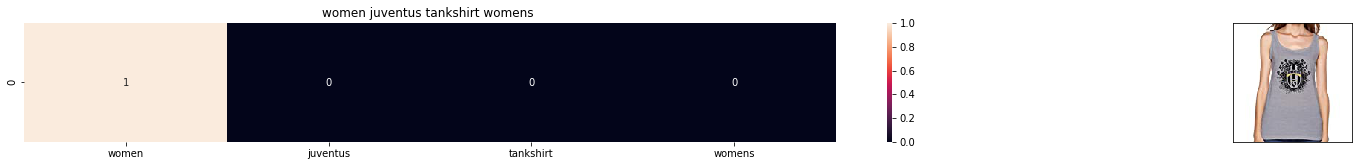

ASIN : B01FY3H4XI
Brand: YUXING
Title: women juventus tankshirt womens 
Euclidean similarity with the query image : 3.3166247903554


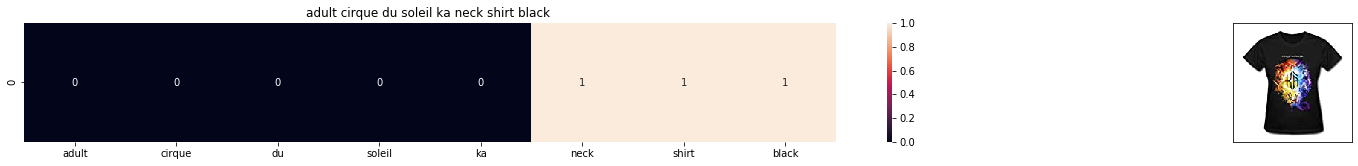

ASIN : B01H2YUJDY
Brand: VWRXA
Title: adult cirque du soleil ka neck shirt black 
Euclidean similarity with the query image : 3.3166247903554


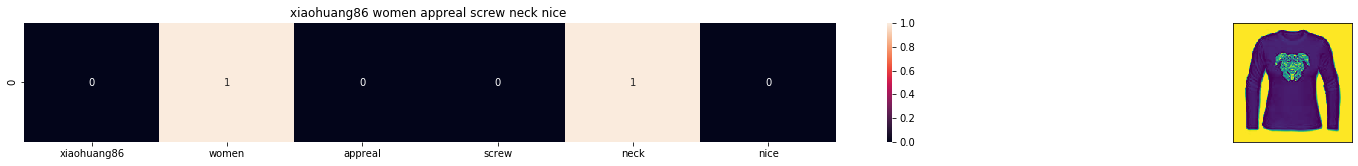

ASIN : B01M64E2LP
Brand: Xiaohuang86
Title: xiaohuang86 women appreal screw neck nice 
Euclidean similarity with the query image : 3.3166247903554


In [83]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(7, 61) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.



# TF-IDF product similarity

In [38]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

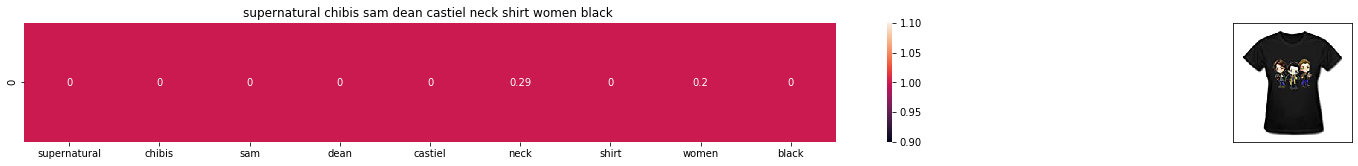

ASIN : B014ICB9A0
BRAND : FNC7C
Eucliden distance from the given image : 0.0


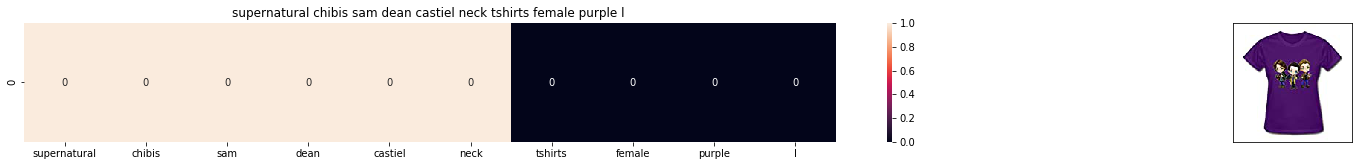

ASIN : B014ICEJ1Q
BRAND : FNC7C
Eucliden distance from the given image : 1.2748362536939148


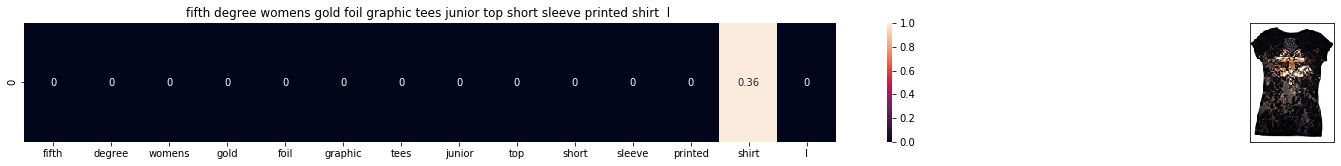

ASIN : B01NACPBG2
BRAND : Fifth Degree
Eucliden distance from the given image : 1.3306045255483403


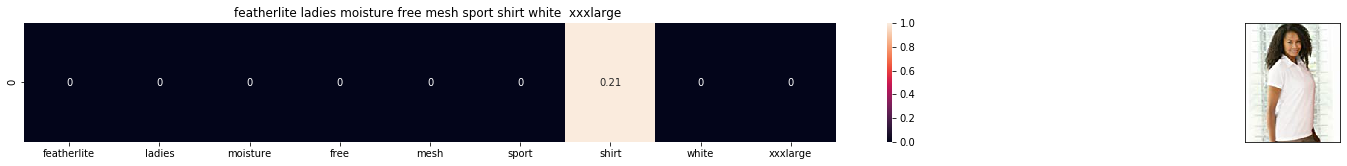

ASIN : B003BSRPB0
BRAND : FeatherLite
Eucliden distance from the given image : 1.376411530629599


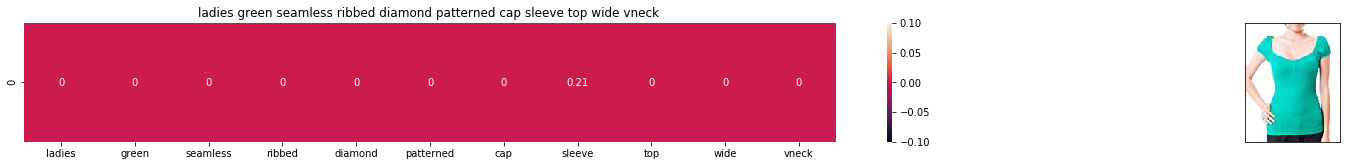

ASIN : B00480IRZS
BRAND : FineBrandShop
Eucliden distance from the given image : 1.3810059415921847


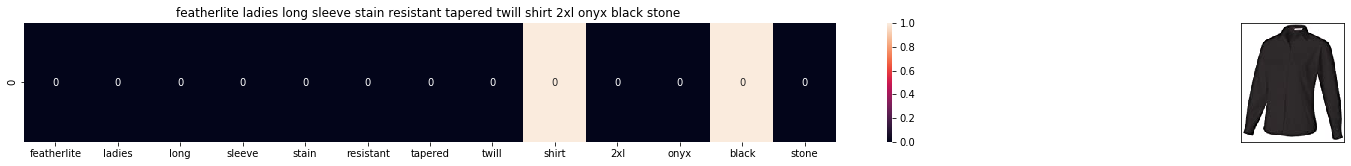

ASIN : B004GSI2OS
BRAND : FeatherLite
Eucliden distance from the given image : 1.3857910610809288


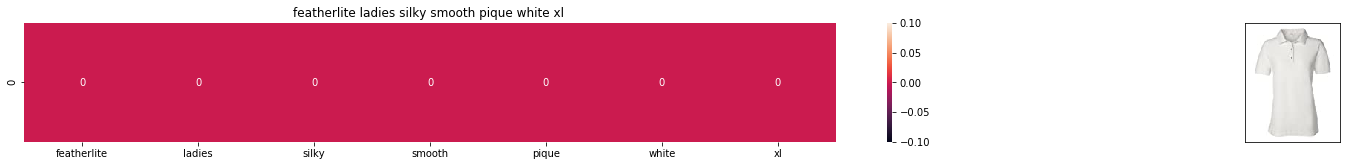

ASIN : B0079BMKDS
BRAND : FeatherLite
Eucliden distance from the given image : 1.3907827375338033


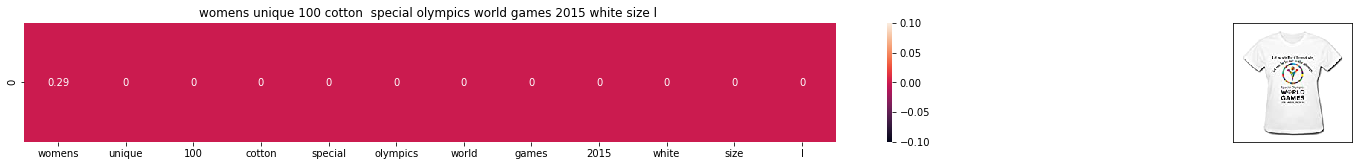

ASIN : B012YX2ZPI
BRAND : HX-Kingdom Fashion T-shirts
Eucliden distance from the given image : 1.414213562373095


In [82]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(7, 61)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title